# Event log analysis

[PM4Py](https://processintelligence.solutions/pm4py) is a Python library that implements many process mining algorithms. It supports reading of event logs in several formats, e.g., XES, discovery of process models from the event logs and conformance checking of the actual process execution with the model. Refer to the [user guide](https://processintelligence.solutions/static/api/2.7.11/index.html) for the details on PM4Py library.

In this lesson, you will get familiar with the XES standard for event logs and conduct basic analyseses of the event log in PM4Py.

## Preliminaries

Install PM4Py package and download event logs for exercises.

In [1]:
!pip install pm4py
!pip install pyvis
!wget http://www.cs.put.poznan.pl/tpawlak/files/EP/JournalReview.xes

from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import files

from IPython.display import display
from IPython.display import IFrame

import base64

import pandas as pd


def view_html(filename: str):
  display(IFrame(src="data:text/html;base64," + base64.b64encode(open(filename, "rb").read()).decode("ascii"), width=1000, height=1000))

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=42a0e4ea80aa4d152f29f0c2fc37ad3ed88103991627887b10913d95701ed82c
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.9 MB/s eta 0:00:00
--2025-04-02 13:26:14--  http://www.cs.put.poznan.pl/tpawlak/files/EP/JournalReview.xes
Resolving www.cs.put.poznan.pl (www.cs.put.poznan.pl)... 150.254.30.30
Connecting to www.cs.put.poznan.pl (www.cs.put.poznan.pl)|150.254.30.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 596864 (583K) [text/plain]
Saving to: ‘JournalReview.xes’

JournalReview.xes   100%[===================>] 582.88K  

## Exercises

View the contents of the JournalReview.xes event log and try to understand its structure. Answer these questions:
* What is the basic structure of the event log? How do log, traces, and events correspond to each other?
* What attributes belong to the event log, traces, and events?
* What is the meaning of attributes?
* What is an extension? What is it intended for?
* What is a global attribute? What is its meaning?
* What is a classifier? What is its purpose?
* What type of process is recorded in this event log?


In [2]:
!head -100 JournalReview.xes

<?xml version="1.0" encoding="UTF-8" ?>
<!-- This file has been generated with the OpenXES library. It conforms -->
<!-- to the XML serialization of the XES standard for log storage and -->
<!-- management. -->
<!-- XES standard version: 1.0 -->
<!-- OpenXES library version: 1.0RC7 -->
<!-- OpenXES is available from http://www.openxes.org/ -->
<log xes.version="1.0" xes.features="nested-attributes" openxes.version="1.0RC7" xmlns="http://www.xes-standard.org/">
	<extension name="Lifecycle" prefix="lifecycle" uri="http://www.xes-standard.org/lifecycle.xesext"/>
	<extension name="Organizational" prefix="org" uri="http://www.xes-standard.org/org.xesext"/>
	<extension name="Time" prefix="time" uri="http://www.xes-standard.org/time.xesext"/>
	<extension name="Concept" prefix="concept" uri="http://www.xes-standard.org/concept.xesext"/>
	<extension name="Semantic" prefix="semantic" uri="http://www.xes-standard.org/semantic.xesext"/>
	<global scope="trace">
		<string key="concept:name" value="_

Parse event log JournalReview.xes using PM4Py.

In [3]:
import pm4py

log = pm4py.read_xes("JournalReview.xes")
# NOTE: ignore a warning about the missing CUDA driver if occurs; it will work without CUDA anyway
display(log)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

,org:resource,time:timestamp,concept:name,lifecycle:transition,case:concept:name,result
0,Anne,2006-01-01 00:00:00,invite reviewers,start,1,NaN
1,Anne,2006-01-05 00:00:00,invite reviewers,complete,1,NaN
2,Mary,2006-01-05 00:00:00,get review 2,complete,1,reject
3,__INVALID__,2006-01-07 00:00:00,time-out 1,complete,1,NaN
4,__INVALID__,2006-01-15 00:00:00,time-out 3,complete,1,NaN
...,...,...,...,...,...,...
2292,Anne,2007-06-12 01:00:00,invite additional reviewer,start,99,NaN
2293,Anne,2007-06-12 01:00:00,invite additional reviewer,complete,99,NaN
2294,Pete,2007-06-13 01:00:00,get review X,complete,99,reject
2295,Anne,2007-06-14 01:00:00,reject,start,99,NaN


Answer the below questions.

How many traces are in the event log?

In [4]:
n_traces = len(log["case:concept:name"].unique())
print(f"# traces: {n_traces}")

# traces: 100


How many events are in the event log?

In [5]:
n_events = len(log)
print(f"# events: {n_events} ({float(n_events)/n_traces} per trace)")

# events: 2297 (22.97 per trace)


What activities occur in the process? What activities are most common?

In [6]:
activity_attribute = "concept:name"
activities = log.groupby(activity_attribute)[activity_attribute].count()
activities

,concept:name
concept:name,
accept,90
collect reviews,200
decide,200
get review 1,49
get review 2,56
get review 3,58
get review X,201
invite additional reviewer,798
invite reviewers,200


What are the start and end activities?

In [7]:
start_activities = pm4py.stats.get_start_activities(log)
end_activities = pm4py.stats.get_end_activities(log)
print("Start activities:")
display(start_activities)
print("End activities:")
display(end_activities)

Start activities:


{'invite reviewers': 100}

End activities:


{'reject': 55, 'accept': 45}

What period is covered by the event log?

In [8]:
timestamp_attribute = "time:timestamp"
beginning = log[timestamp_attribute].min()
end = log[timestamp_attribute].max()

display(beginning)
display(end)

Timestamp('2006-01-01 00:00:00')

Timestamp('2008-05-05 01:00:00')

Visualize events volume over time

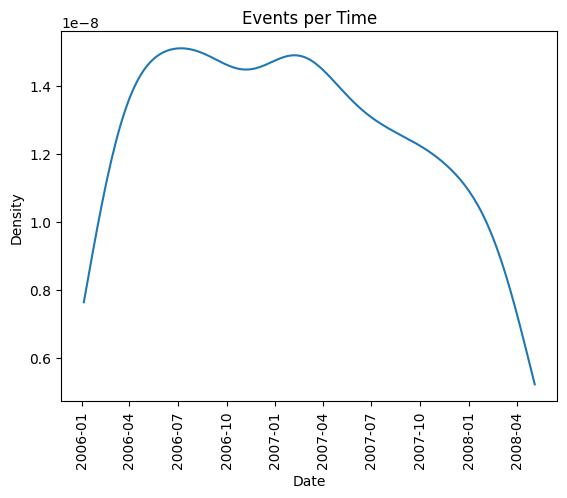

In [9]:
pm4py.vis.view_events_per_time_graph(log)

How long are business cases?

In [10]:
trace_durations = pm4py.get_all_case_durations(log)
trace_durations = pd.Series(trace_durations)

print("Duration in seconds:")
print(trace_durations.describe())

print("Duration in hours:")
print((trace_durations / 3600).describe())

Duration in seconds:
count    1.000000e+02
mean     2.466328e+07
std      1.643214e+07
min      1.036800e+06
25%      7.992000e+06
50%      2.346120e+07
75%      3.840750e+07
max      6.428160e+07
dtype: float64
Duration in hours:
count      100.000000
mean      6850.910000
std       4564.482966
min        288.000000
25%       2220.000000
50%       6517.000000
75%      10668.750000
max      17856.000000
dtype: float64


Visualize density of case duration.

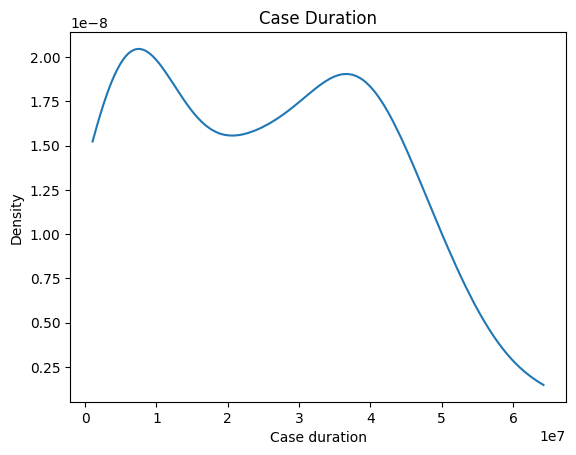

In [11]:
pm4py.vis.view_case_duration_graph(log)

How many events belong to cases?

In [12]:
case_id_attribute = "case:concept:name"
lengths = log.groupby(case_id_attribute)[case_id_attribute].count()
lengths.describe()

,case:concept:name
count,100.000000
mean,22.970000
std,8.877909
min,11.000000
25%,17.000000
50%,20.000000
75%,29.000000
max,50.000000


Who is responsible for certain activities?

In [13]:
resource_attribute = "org:resource"
activities_resources = log.groupby(activity_attribute)[resource_attribute].unique().transform(", ".join)
display(activities_resources)

print("Alternative solution:")
org_roles = pm4py.discover_organizational_roles(log)
display(org_roles)

,org:resource
concept:name,
accept,"Mike, Anne"
collect reviews,"Mike, Anne"
decide,Wil
get review 1,"John, Sara, Pete, Sam, Mary, Carol, Pam"
get review 2,"Mary, John, Pete, Sam, Carol, Sara, Pam"
get review 3,"Mary, Pete, Carol, Pam, John, Sara, Sam"
get review X,"Pam, Sam, Carol, Pete, John, Mary, Sara"
invite additional reviewer,"Mike, Anne"
invite reviewers,"Anne, Mike"


Alternative solution:


[Activities: ['accept', 'collect reviews', 'invite additional reviewer', 'invite reviewers', 'reject'] Originators importance {'Anne': 706, 'Mike': 692},
 Activities: ['get review 1', 'get review 2', 'get review 3', 'get review X'] Originators importance {'Carol': 53, 'John': 61, 'Mary': 45, 'Pam': 48, 'Pete': 53, 'Sam': 55, 'Sara': 49},
 Activities: ['time-out 1', 'time-out 2', 'time-out 3', 'time-out X'] Originators importance {'__INVALID__': 335},
 Activities: ['decide'] Originators importance {'Wil': 200}]

Who begins and ends the process?

In [14]:
print("People starting the process:")
display(log[log[activity_attribute].isin(start_activities)][resource_attribute].unique())

print("People ending the process:")
display(log[log[activity_attribute].isin(end_activities)][resource_attribute].unique())

People starting the process:


array(['Anne', 'Mike'], dtype=object)

People ending the process:


array(['Anne', 'Mike'], dtype=object)

What are most common process variants?

In [15]:
variants = pm4py.get_variants(log)
common_variants = pd.DataFrame(variants.items(), columns=["variant", "count"]).sort_values("count", ascending=False)
display(common_variants)

,variant,count
32,"(invite reviewers, invite reviewers, get revie...",3
25,"(invite reviewers, invite reviewers, get revie...",2
39,"(invite reviewers, invite reviewers, get revie...",2
0,"(invite reviewers, invite reviewers, get revie...",1
4,"(invite reviewers, invite reviewers, get revie...",1
...,...,...
91,"(invite reviewers, invite reviewers, time-out ...",1
92,"(invite reviewers, invite reviewers, time-out ...",1
93,"(invite reviewers, invite reviewers, get revie...",1
94,"(invite reviewers, invite reviewers, time-out ...",1


Why are there duplicate activities? Try dropping the duplicates.

In [16]:
# Hint: consider only complete event of the activities
log_complete_only = log[log["lifecycle:transition"] == "complete"]
variants_complete_only = pm4py.get_variants(log_complete_only)
common_variants_complete_only = pd.DataFrame(variants_complete_only.items(), columns=["variant", "count"]).sort_values("count", ascending=False)
display(common_variants_complete_only)

,variant,count
32,"(invite reviewers, get review 2, get review 3,...",3
25,"(invite reviewers, get review 2, get review 1,...",2
39,"(invite reviewers, get review 2, get review 1,...",2
0,"(invite reviewers, get review 2, time-out 1, t...",1
4,"(invite reviewers, get review 3, time-out 1, t...",1
...,...,...
91,"(invite reviewers, time-out 1, get review 3, t...",1
92,"(invite reviewers, time-out 1, time-out 2, tim...",1
93,"(invite reviewers, get review 3, time-out 2, g...",1
94,"(invite reviewers, time-out 1, get review 3, g...",1


Do you see any behavioral patterns? What is common to all variants? Are there clear phases visible in the process? Are there loops?

**Try to sketch the process on a piece of paper.**

What is the distribution of the number of reviewers that take part in the review process?

In [17]:
review_events = log[log[activity_attribute].str.contains("get review")]
review_counts = review_events.groupby(case_id_attribute)[case_id_attribute].count()
review_counts.describe()

,case:concept:name
count,100.0000
mean,3.6400
std,1.0202
min,2.0000
25%,3.0000
50%,4.0000
75%,4.0000
max,6.0000


What is the distribution of starting an activity since case start for individual activities? Do some activites run only at the early stages of the process and others run much later?

In [18]:
log_case_start = log.groupby(case_id_attribute)[timestamp_attribute].min()
log["time_since_case_start"] = log.apply(lambda row: row[timestamp_attribute] - log_case_start[row[case_id_attribute]], axis=1)
log.groupby(activity_attribute)["time_since_case_start"].describe()

,count,mean,std,min,25%,50%,75%,max
concept:name,,,,,,,,
accept,90,290 days 17:32:40,195 days 19:00:24.495703326,15 days 00:00:00,108 days 00:30:00,262 days 23:00:00,462 days 17:15:00,660 days 23:00:00
collect reviews,200,33 days 02:15:36,32 days 05:25:24.463400675,3 days 00:00:00,14 days 00:00:00,19 days 12:30:00,38 days 12:45:00,176 days 23:00:00
decide,200,38 days 04:06:18,33 days 15:25:14.090089291,6 days 00:00:00,17 days 00:00:00,24 days 12:30:00,49 days 01:00:00,182 days 23:00:00
get review 1,49,5 days 22:34:17.142857142,2 days 23:05:02.989431542,0 days 00:00:00,4 days 00:00:00,6 days 00:00:00,8 days 00:00:00,15 days 00:00:00
get review 2,56,5 days 03:52:30,2 days 19:51:36.119122228,0 days 00:00:00,3 days 00:00:00,5 days 00:00:00,7 days 00:00:00,15 days 00:00:00
get review 3,58,5 days 19:53:47.586206896,2 days 19:55:47.879137322,0 days 00:00:00,4 days 00:00:00,5 days 12:00:00,8 days 00:00:00,16 days 00:00:00
get review X,201,264 days 18:02:41.194029852,178 days 04:24:57.056150266,20 days 00:00:00,104 days 23:00:00,242 days 01:00:00,400 days 00:00:00,737 days 00:00:00
invite additional reviewer,798,250 days 08:01:39.248120300,171 days 04:53:31.584573870,12 days 00:00:00,95 days 00:15:00,231 days 00:00:00,381 days 17:15:00,737 days 00:00:00
invite reviewers,200,1 days 08:24:36,1 days 23:27:18.181461949,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,3 days 00:00:00,12 days 00:00:00


What is the distribution of events w.r.t. the day of week?

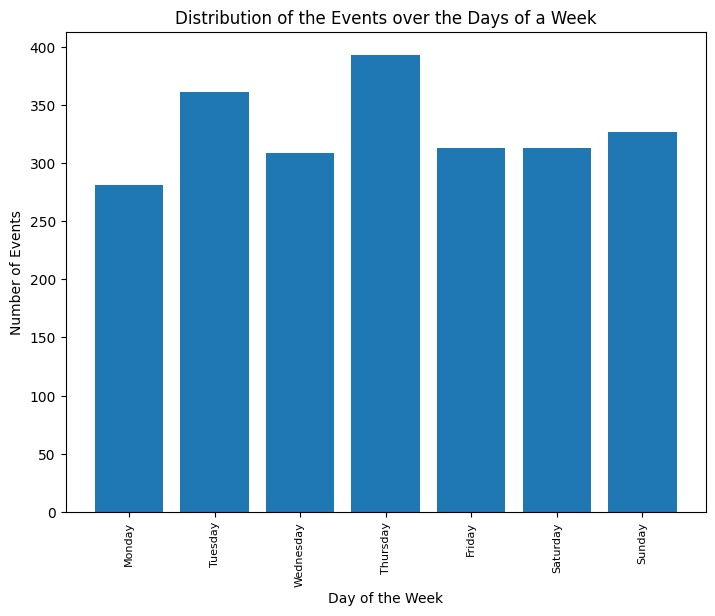

In [19]:
pm4py.view_events_distribution_graph(log, distr_type="days_week")

How long does the longest business case take? What is the outcome of the review process?

In [20]:
case_duration = log.groupby("case:concept:name")["time_since_case_start"].max()
longest_case_id = case_duration.index[case_duration.argmax()]
log[log["case:concept:name"] == longest_case_id]

,org:resource,time:timestamp,concept:name,lifecycle:transition,case:concept:name,result,time_since_case_start
78,Anne,2006-02-28 00:00:00,invite reviewers,start,11,NaN,0 days 00:00:00
79,Anne,2006-03-01 00:00:00,invite reviewers,complete,11,NaN,1 days 00:00:00
80,__INVALID__,2006-03-02 00:00:00,time-out 3,complete,11,NaN,2 days 00:00:00
81,John,2006-03-05 00:00:00,get review 2,complete,11,reject,5 days 00:00:00
82,__INVALID__,2006-03-07 00:00:00,time-out 1,complete,11,NaN,7 days 00:00:00
83,Anne,2006-03-16 00:00:00,collect reviews,start,11,NaN,16 days 00:00:00
84,Anne,2006-03-17 00:00:00,collect reviews,complete,11,NaN,17 days 00:00:00
85,Wil,2006-03-25 00:00:00,decide,start,11,NaN,25 days 00:00:00
86,Wil,2006-03-30 01:00:00,decide,complete,11,NaN,30 days 01:00:00
87,Mike,2006-03-31 01:00:00,invite additional reviewer,start,11,NaN,31 days 01:00:00


Discover a BPMN model using Inductive Miner and verify whether your guess about the process is correct.

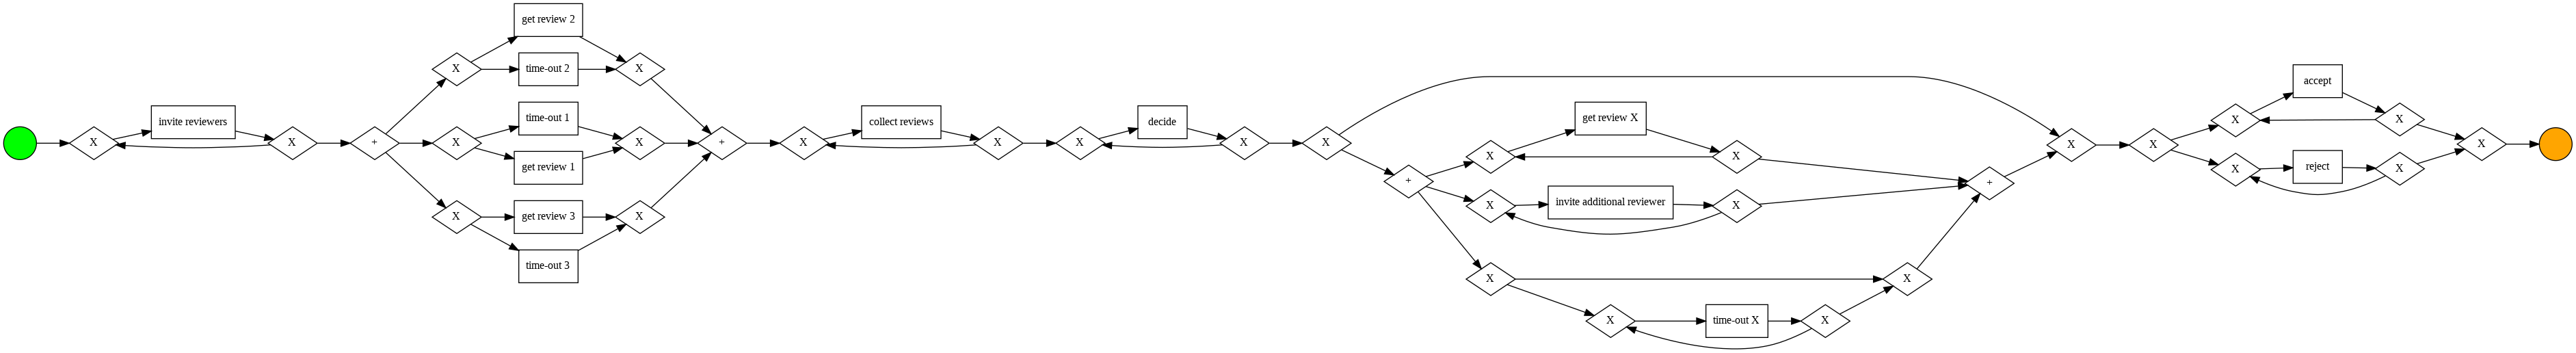

In [21]:
model = pm4py.discover_bpmn_inductive(log)
pm4py.view_bpmn(model)

Is the above model correct? The Inductive Miner algorithm does not handle well the lifecycle of activities. Try building model using complete events only.

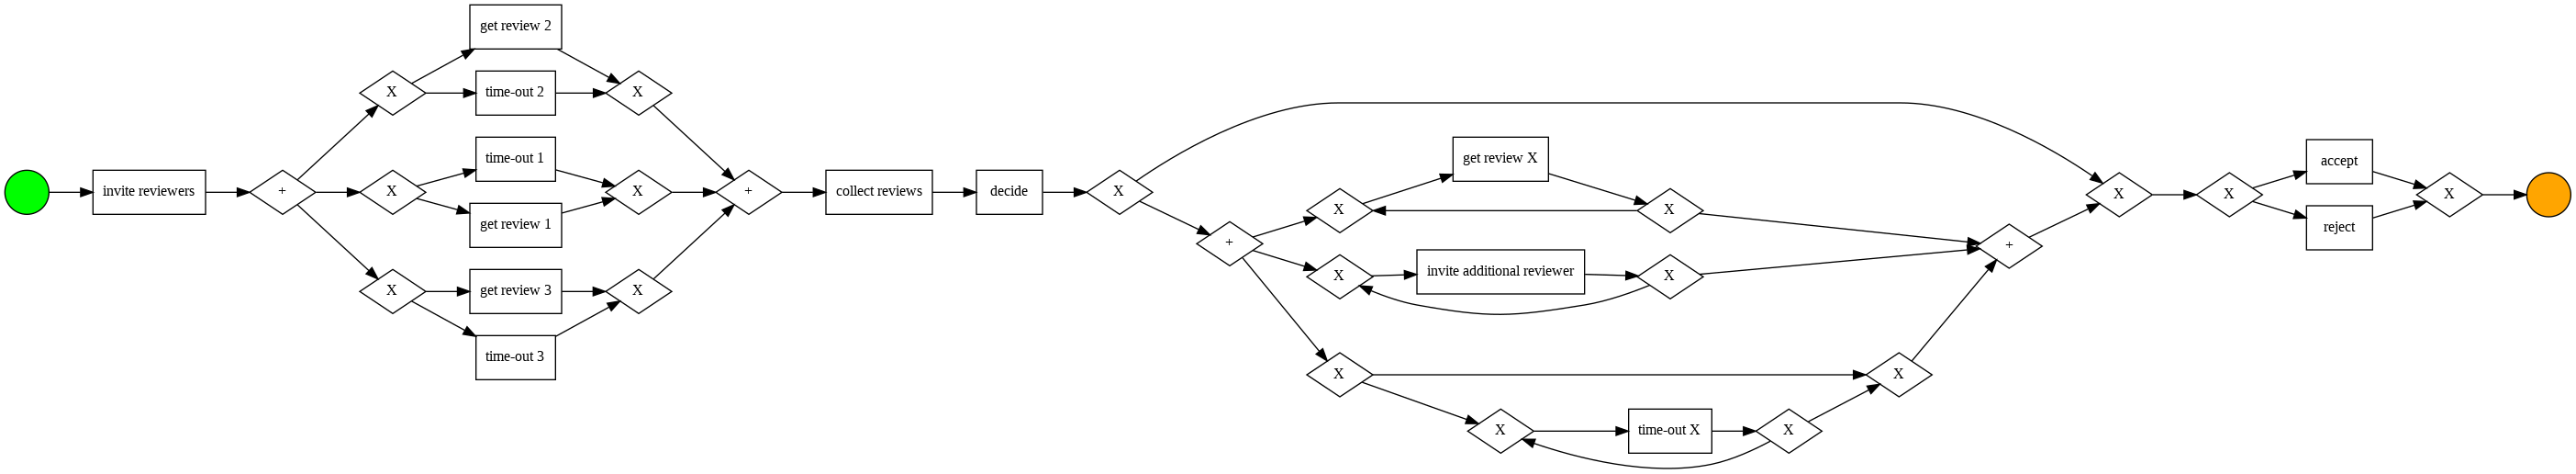

In [22]:
model = pm4py.discover_bpmn_inductive(log_complete_only)
pm4py.view_bpmn(model)

Build a social network of the resources involved in the process based on the handover of work. Use only the complete events.

Hint: below the visualiation you can find parameters; adjust physics / solver parameter to make the visualization readable.

In [23]:
sna_handover = pm4py.discover_handover_of_work_network(log_complete_only)
pm4py.save_vis_sna(sna_handover, "sna_handover.html")
view_html("sna_handover.html")

Build a subcontractor network.

In [24]:
sna_subcontracting = pm4py.discover_subcontracting_network(log_complete_only)
pm4py.save_vis_sna(sna_subcontracting, "sna_subcontracting.html")
view_html("sna_subcontracting.html")

Calculate the accept/reject ratio for each reviewer. Do all reviewers have roughly the same acceptance ratio, or some reviewer is more demanding than the others?

In [25]:
review_results = log_complete_only[log_complete_only["concept:name"].str.startswith("get review")]
review_results.groupby(["org:resource", "result"])["result"].count()

org:resource  result
Carol         accept    29
              reject    24
John          accept    33
              reject    28
Mary          accept    22
              reject    23
Pam           accept    21
              reject    27
Pete          accept    28
              reject    25
Sam           accept    18
              reject    37
Sara          accept    27
              reject    22
Name: result, dtype: int64